<a href="https://colab.research.google.com/github/pratham-svg/play-store-data-analysis-EDA-pratham/blob/main/pratham_capstone_project_alma_better.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.

In [ ]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from matplotlib import cm
import seaborn as sn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing files from drive
file_path = '/content/drive/MyDrive/alma better/play store data/Play Store Data.csv'
df_PlayStore =pd.read_csv(file_path)
df_PlayStore[df_PlayStore['Reviews'] == '3.0M']
df_PlayStore.drop(df_PlayStore[df_PlayStore['Reviews'] == '3.0M'].index, inplace = True)

In [ ]:
df_PlayStore['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
#data cleaning 
df_PlayStore['Installs'] = df_PlayStore['Installs'].str.replace('+', '')
df_PlayStore['Installs'] = df_PlayStore['Installs'].str.replace(',', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
#data cleaning 
df_PlayStore['Size'].unique()
df_PlayStore['Size'] = df_PlayStore['Size'].str.extract('(\d+)').astype(float)
df_PlayStore['Price'] = df_PlayStore['Price'].str.extract('(\d+)').astype(float)

In [ ]:
#data cleaning 
df_PlayStore.info()
df_PlayStore['Reviews'] = df_PlayStore['Reviews'].astype(float)
df_PlayStore['Rating'] = df_PlayStore['Rating'].astype(float)
df_PlayStore['Size'] = df_PlayStore['Size'].astype(float)
df_PlayStore['Installs'] = df_PlayStore['Installs'].astype(float)
df_PlayStore['Price'] = df_PlayStore['Price'].astype(float)

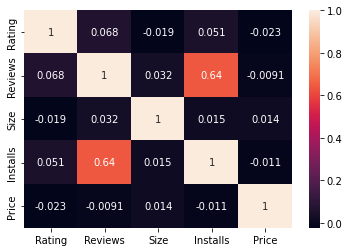

In [ ]:
#heat for getting relation between each and every column
sn.heatmap(df_PlayStore.corr(), annot=True)

In [ ]:
#here we are plotting graph between apps Installs and there  Reviews
color = cm.inferno_r(np.linspace(.4, .8, 30))
df_PlayStore.plot.scatter(x ='Installs', y ='Reviews' );

In [ ]:
df_PlayStore.info()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

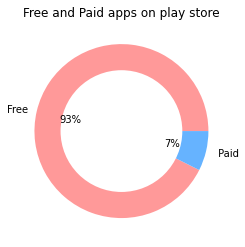

In [ ]:
#Here we are plotting graph between free and paid app 
df_PlayStore=pd.read_csv(file_path)
Price_list = df_PlayStore["Price"].values.tolist()
print(Price_list)
Price = 0
Free = 0
for i in range(0,10840):
  if Price_list[i] == "0":
     Price = Price + 1
  elif Price_list[i] != 0:
      Free = Free + 1
print(f"{Price} {Free}")
y = [ Price , Free  ]
mylabels = ["Free", " Paid"]
colors = ['#ff9999','#66b3ff']
plt.pie(y, labels = mylabels,colors = colors ,autopct='%1.0f%%')
plt.title('Free and Paid apps on play store')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

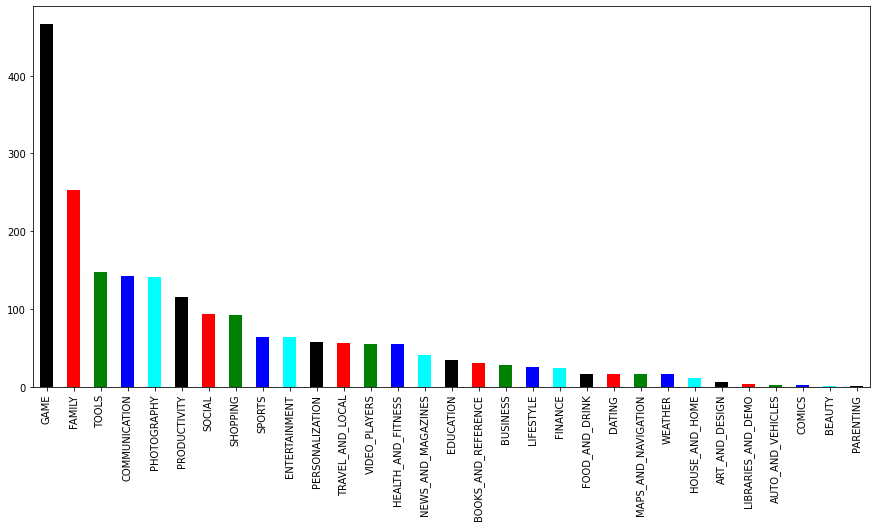

In [ ]:
#top apps in every Category
df_top_Category = df_PlayStore[ df_PlayStore['Installs'] >= 10000000]
df_top_Category = df_top_Category["Category"].value_counts()
fig, ax = plt.subplots(figsize=(15,7))
df_top_Category.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

Text(0.5, 0, 'Category')

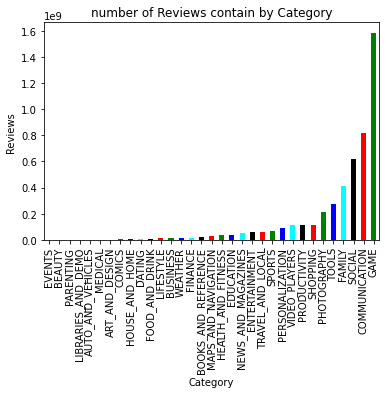

In [ ]:
#Here we are plotting graph between Reviews as per Category
df_Category = df_PlayStore.groupby(['Category'])['Reviews'].sum()
df_Category = df_Category.sort_values()
df_Category.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']);
plt.title('number of Reviews contain by Category')
plt.ylabel('Reviews ')
plt.xlabel('Category')


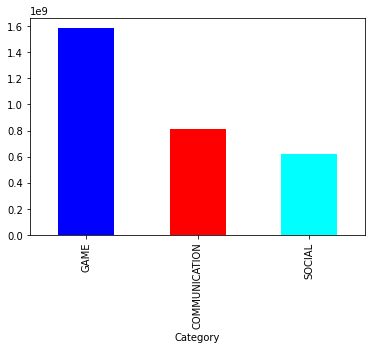

In [ ]:
#Here we are plotting graph between top 3 Reviews as per Category
df_Category.sort_values(ascending=False)[ : 3].plot(kind='bar',color=['blue', 'red', 'cyan', 'blue', 'cyan']);

In [ ]:
#Here we are finding top app contain by top 3 catagary
df_PlayStore=pd.read_csv(file_path)
heihest_revied_apps = ['GAME','SOCIAL','COMMUNICATION']
for i in range(0,3):
 df3 = df_PlayStore[df_PlayStore['Category'] == heihest_revied_apps[i]]
 df3 = df3.sort_values(by=['Reviews'],ascending=False)
 print(df3.iloc[ 0 : 1 , 0 : 1])

                               App
3874  Rope Hero Return of a Legend
                                  App
10220  Phoenix - Facebook & Messenger
                   App
353  MegaFon Dashboard


In [ ]:
#number of apps contain by each Category
df_PlayStore=pd.read_csv(file_path)
df_Category = df_PlayStore[df_PlayStore['Rating'] >= 4]
df_Category.drop_duplicates(subset=['App'])
df_Category = df_Category.sort_values(['Reviews', 'Installs'],
              ascending = [False, False])
df_Category.head(10)


Text(0.5, 0, 'Category')

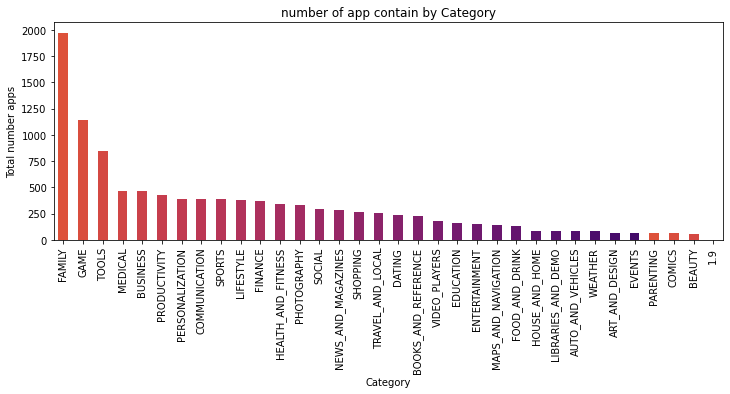

In [ ]:
color = cm.inferno_r(np.linspace(.4, .8, 30))
df_app = df_PlayStore["Category"].value_counts()
df_app.plot(kind='bar', color=color, legend=False, figsize=(12, 4));
plt.title('number of app contain by Category')
plt.ylabel('Total number apps')
plt.xlabel('Category')

In [ ]:
# pie char for download 
df_PlayStore.info()

9660
6287 1632 224 54 1462 9659


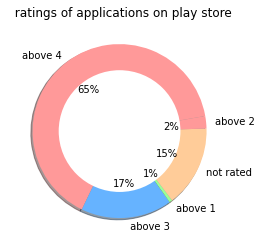

In [ ]:
#rating of apps 
a = dict(zip(df_PlayStore.App, df_PlayStore.Rating))
rating_4 = 0
rating_3 = 0
rating_2 = 0
rating_1 = 0
no_rating = 0
print(len(a))
for i in a:
  if a[i] >= 4:
     rating_4 = rating_4 + 1
  elif a[i] >= 3 :
      rating_3 = rating_3 + 1
  elif a[i] >= 2 :
      rating_2 = rating_2 + 1
  elif a[i] >= 1 :
      rating_1 = rating_1 + 1
no_rating =  9659 - rating_4 - rating_3 - rating_2 - rating_1     
total =   rating_4 + rating_3 + rating_2 + rating_1 + no_rating
print(f"{rating_4} {rating_3} {rating_2} {rating_1} {no_rating} {total}")
y = [ rating_4 , rating_3 , rating_1 ,no_rating,rating_2 ]
mylabels = ["above 4", " above 3", "above 1","not rated ", "above 2"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(y, labels = mylabels , colors = colors,autopct='%1.0f%%',shadow=True, startangle=10)
plt.title('  ratings of applications on play store')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [ ]:
df_PlayStore.info()

In [ ]:
#apps created for diffrent category
gp = df_PlayStore["Content Rating"].value_counts()
gp

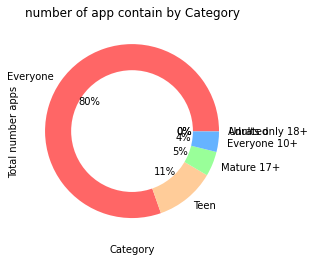

In [ ]:
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
gp = df_PlayStore["Content Rating"].value_counts()
gp.plot(kind='pie', colors = colors,autopct='%1.0f%%');
plt.title('number of app contain by Category')
plt.ylabel('Total number apps')
plt.xlabel('Category')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [ ]:
file_path = '/content/drive/MyDrive/capston project alma better/User Reviews (1).csv'
reveiw_df =pd.read_csv(file_path)

In [ ]:
reveiw_df.head()

In [ ]:
df_PlayStore.info()

In [ ]:
df_PlayStore['year'] = df_PlayStore['Last Updated'].str[-4:]

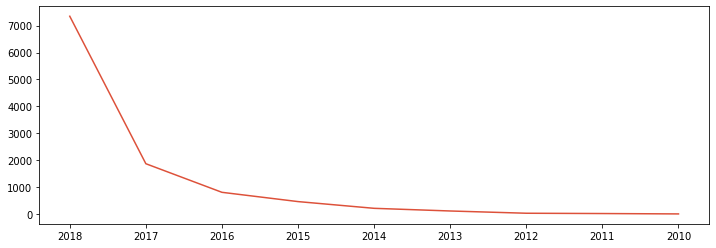

In [ ]:
#number of apps getting update each year
df_update_year = df_PlayStore["year"].value_counts()
df_update_year
df_update_year.plot(kind='line', color=color, legend=False, figsize=(12, 4));

In [ ]:
reveiw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               64295 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reveiw_df["Sentiment"].fillna("Neutral", inplace = True)

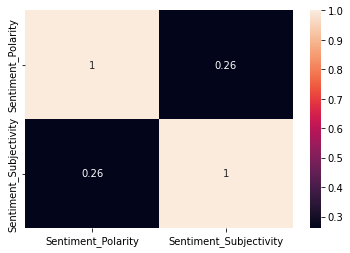

In [ ]:
#heatmap for each user review data
reveiw_df.corr()
sn.heatmap(reveiw_df.corr(), annot=True)

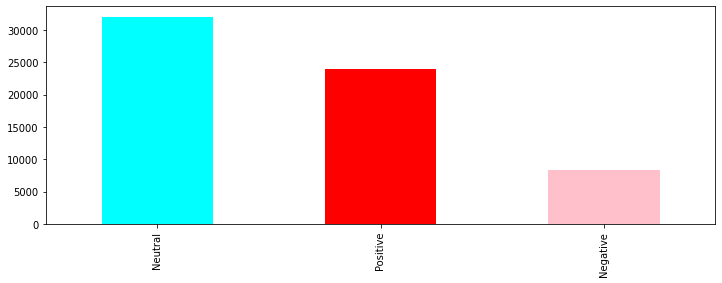

In [ ]:
#application getting reviews Sentiment
reveiw_df
reveiw_df["Sentiment"].value_counts().plot(kind='bar',color=['cyan', 'red', 'pink', 'blue', 'cyan'] , legend=False, figsize=(12, 4));

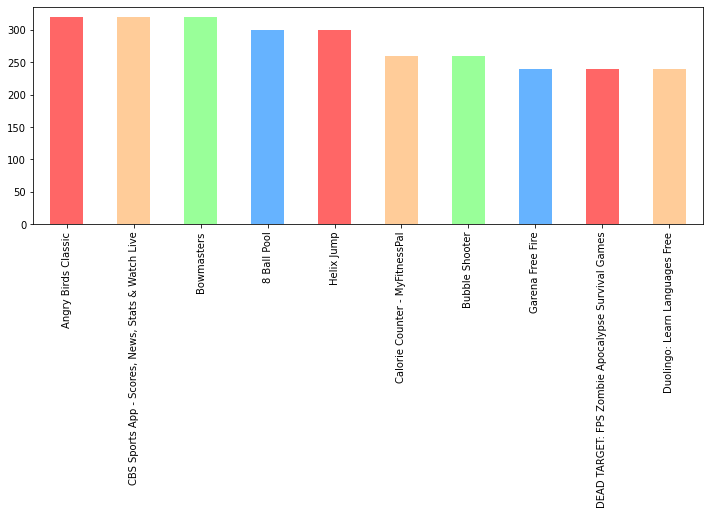

In [ ]:
#apps getting highest review 
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
reveiw_df["App"].value_counts()[0:10].plot(kind='bar',color=colors , legend=False, figsize=(12, 4));